In [4]:
from bs4 import BeautifulSoup
import requests
from IPython.core.display import display, HTML
import pandas as pd
import pickle
import re
from my_functions import *
import time
%pylab inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score


import statsmodels.api as sm
import statsmodels.formula.api as smf 
import patsy

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



Populating the interactive namespace from numpy and matplotlib


In [6]:
rough_horror_df1=pd.read_pickle('rough_horror_df1.pkl')
rough_horror_df1

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Link stub
0,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,"602,815",97,/title/tt0054215/
1,The Shining,(1980),146,"Drama, Horror",8.4,"896,027",66,/title/tt0081505/
2,Alien,(1979),117,"Horror, Sci-Fi",8.4,"786,083",89,/title/tt0078748/
3,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/
4,What Ever Happened to Baby Jane?,(1962),134,"Drama, Horror, Thriller",8.1,"49,967",75,/title/tt0056687/
...,...,...,...,...,...,...,...,...
931,Jaws: The Revenge,(1987),89,"Adventure, Horror, Thriller",3.0,"41,154",15,/title/tt0093300/
932,BloodRayne,(2005),95,"Action, Fantasy, Horror",2.9,"34,131",18,/title/tt0383222/
933,The Human Centipede III (Final Sequence),(2015),102,"Comedy, Crime, Horror",2.7,"14,729",5,/title/tt1883367/
934,Alone in the Dark,(2005),96,"Action, Horror, Sci-Fi",2.4,"41,668",9,/title/tt0369226/


In [7]:
movies_page=[]
for link in rough_horror_df1['Link stub']:
    movies_page.append(get_movie_dict(link))

In [8]:
movies_page=pd.DataFrame(movies_page)
movies_page

,Director,Star,Budget,Country,Novel Adaptation,Link stub
0,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",806947,USA,1,/title/tt0054215/
1,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",19000000,UK,1,/title/tt0081505/
2,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",11000000,UK,0,/title/tt0078748/
3,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",15000000,USA,0,/title/tt0084787/
4,Robert Aldrich,"[Bette Davis, Joan Crawford, Victor Buono]",980000,USA,1,/title/tt0056687/
...,...,...,...,...,...,...
931,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",23000000,USA,0,/title/tt0093300/
932,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",25000000,Germany,0,/title/tt0383222/
933,Tom Six,"[Dieter Laser, Laurence R. Harvey, Eric Roberts]",\nGross USA: $16184,Netherlands,0,/title/tt1883367/
934,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",20000000,Canada,0,/title/tt0369226/


In [9]:
movies_page.to_pickle('movies_page.pkl')

In [10]:
movies_page=pd.read_pickle('movies_page.pkl')
movies_page

,Director,Star,Budget,Country,Novel Adaptation,Link stub
0,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",806947,USA,1,/title/tt0054215/
1,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",19000000,UK,1,/title/tt0081505/
2,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",11000000,UK,0,/title/tt0078748/
3,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",15000000,USA,0,/title/tt0084787/
4,Robert Aldrich,"[Bette Davis, Joan Crawford, Victor Buono]",980000,USA,1,/title/tt0056687/
...,...,...,...,...,...,...
931,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",23000000,USA,0,/title/tt0093300/
932,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",25000000,Germany,0,/title/tt0383222/
933,Tom Six,"[Dieter Laser, Laurence R. Harvey, Eric Roberts]",\nGross USA: $16184,Netherlands,0,/title/tt1883367/
934,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",20000000,Canada,0,/title/tt0369226/


In [11]:
horror_df1=rough_horror_df1.merge(movies_page,left_index=True,right_index=True)
horror_df1

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Link stub_x,Director,Star,Budget,Country,Novel Adaptation,Link stub_y
0,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,"602,815",97,/title/tt0054215/,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",806947,USA,1,/title/tt0054215/
1,The Shining,(1980),146,"Drama, Horror",8.4,"896,027",66,/title/tt0081505/,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",19000000,UK,1,/title/tt0081505/
2,Alien,(1979),117,"Horror, Sci-Fi",8.4,"786,083",89,/title/tt0078748/,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",11000000,UK,0,/title/tt0078748/
3,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",15000000,USA,0,/title/tt0084787/
4,What Ever Happened to Baby Jane?,(1962),134,"Drama, Horror, Thriller",8.1,"49,967",75,/title/tt0056687/,Robert Aldrich,"[Bette Davis, Joan Crawford, Victor Buono]",980000,USA,1,/title/tt0056687/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Jaws: The Revenge,(1987),89,"Adventure, Horror, Thriller",3.0,"41,154",15,/title/tt0093300/,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",23000000,USA,0,/title/tt0093300/
932,BloodRayne,(2005),95,"Action, Fantasy, Horror",2.9,"34,131",18,/title/tt0383222/,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",25000000,Germany,0,/title/tt0383222/
933,The Human Centipede III (Final Sequence),(2015),102,"Comedy, Crime, Horror",2.7,"14,729",5,/title/tt1883367/,Tom Six,"[Dieter Laser, Laurence R. Harvey, Eric Roberts]",\nGross USA: $16184,Netherlands,0,/title/tt1883367/
934,Alone in the Dark,(2005),96,"Action, Horror, Sci-Fi",2.4,"41,668",9,/title/tt0369226/,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",20000000,Canada,0,/title/tt0369226/


In [13]:
demo_df=pd.read_pickle('demo_page.pkl')
horror_df1=horror_df1.merge(demo_df,left_index=True,right_index=True)
horror_df1

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Link stub_x,Director,Star,Budget,Country,Novel Adaptation,Link stub_y,Male Score,Male Total Votes,Female Score,Female Total Votes,Link stub
0,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,"602,815",97,/title/tt0054215/,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",806947,USA,1,/title/tt0054215/,8.5,"353,389",8.4,"88,145",/title/tt0054215/
1,The Shining,(1980),146,"Drama, Horror",8.4,"896,027",66,/title/tt0081505/,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",19000000,UK,1,/title/tt0081505/,8.4,"530,475",8.3,"124,287",/title/tt0081505/
2,Alien,(1979),117,"Horror, Sci-Fi",8.4,"786,083",89,/title/tt0078748/,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",11000000,UK,0,/title/tt0078748/,8.5,"507,612",8.2,"73,461",/title/tt0078748/
3,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",15000000,USA,0,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/
4,What Ever Happened to Baby Jane?,(1962),134,"Drama, Horror, Thriller",8.1,"49,967",75,/title/tt0056687/,Robert Aldrich,"[Bette Davis, Joan Crawford, Victor Buono]",980000,USA,1,/title/tt0056687/,8.0,"28,768",8.3,"10,292",/title/tt0056687/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Jaws: The Revenge,(1987),89,"Adventure, Horror, Thriller",3.0,"41,154",15,/title/tt0093300/,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",23000000,USA,0,/title/tt0093300/,2.9,"27,697",3.6,"3,417",/title/tt0093300/
932,BloodRayne,(2005),95,"Action, Fantasy, Horror",2.9,"34,131",18,/title/tt0383222/,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",25000000,Germany,0,/title/tt0383222/,2.9,"25,173",3.1,"3,255",/title/tt0383222/
933,The Human Centipede III (Final Sequence),(2015),102,"Comedy, Crime, Horror",2.7,"14,729",5,/title/tt1883367/,Tom Six,"[Dieter Laser, Laurence R. Harvey, Eric Roberts]",\nGross USA: $16184,Netherlands,0,/title/tt1883367/,2.8,"9,465",2.6,"1,677",/title/tt1883367/
934,Alone in the Dark,(2005),96,"Action, Horror, Sci-Fi",2.4,"41,668",9,/title/tt0369226/,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",20000000,Canada,0,/title/tt0369226/,2.3,"30,832",2.6,"3,395",/title/tt0369226/


In [14]:
female_df1=pd.read_pickle('female_df1.pkl')
female_df1

,Movie,Female Protagonist
0,Alien,1
1,What Ever Happened to Baby Jane?,1
2,Rosemary's Baby,1
3,The Innocents,1
4,Halloween,1
...,...,...
180,The Grudge,1
181,Yoga Hosers,1
182,The Devil Inside,1
183,Vampires Suck,1


In [15]:
horror_df1=horror_df1.merge(female_df1, how='left', left_on='Movie', right_on='Movie')
horror_df1

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Link stub_x,Director,Star,Budget,Country,Novel Adaptation,Link stub_y,Male Score,Male Total Votes,Female Score,Female Total Votes,Link stub,Female Protagonist
0,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,"602,815",97,/title/tt0054215/,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",806947,USA,1,/title/tt0054215/,8.5,"353,389",8.4,"88,145",/title/tt0054215/,NaN
1,The Shining,(1980),146,"Drama, Horror",8.4,"896,027",66,/title/tt0081505/,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",19000000,UK,1,/title/tt0081505/,8.4,"530,475",8.3,"124,287",/title/tt0081505/,NaN
2,Alien,(1979),117,"Horror, Sci-Fi",8.4,"786,083",89,/title/tt0078748/,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",11000000,UK,0,/title/tt0078748/,8.5,"507,612",8.2,"73,461",/title/tt0078748/,1.0
3,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",15000000,USA,0,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,NaN
4,What Ever Happened to Baby Jane?,(1962),134,"Drama, Horror, Thriller",8.1,"49,967",75,/title/tt0056687/,Robert Aldrich,"[Bette Davis, Joan Crawford, Victor Buono]",980000,USA,1,/title/tt0056687/,8.0,"28,768",8.3,"10,292",/title/tt0056687/,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,Jaws: The Revenge,(1987),89,"Adventure, Horror, Thriller",3.0,"41,154",15,/title/tt0093300/,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",23000000,USA,0,/title/tt0093300/,2.9,"27,697",3.6,"3,417",/title/tt0093300/,NaN
947,BloodRayne,(2005),95,"Action, Fantasy, Horror",2.9,"34,131",18,/title/tt0383222/,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",25000000,Germany,0,/title/tt0383222/,2.9,"25,173",3.1,"3,255",/title/tt0383222/,1.0
948,The Human Centipede III (Final Sequence),(2015),102,"Comedy, Crime, Horror",2.7,"14,729",5,/title/tt1883367/,Tom Six,"[Dieter Laser, Laurence R. Harvey, Eric Roberts]",\nGross USA: $16184,Netherlands,0,/title/tt1883367/,2.8,"9,465",2.6,"1,677",/title/tt1883367/,NaN
949,Alone in the Dark,(2005),96,"Action, Horror, Sci-Fi",2.4,"41,668",9,/title/tt0369226/,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",20000000,Canada,0,/title/tt0369226/,2.3,"30,832",2.6,"3,395",/title/tt0369226/,NaN


In [16]:
monster_df1=pd.read_pickle('monster_df1.pkl')
monster_df1

,Movie,Creature Feature
0,Alien,1
1,The Thing,1
2,King Kong,1
3,Dawn of the Dead,1
4,Evil Dead II,1
...,...,...
187,V/H/S Viral,1
188,Dragon Wars: D-War,1
189,Slender Man,1
190,Alone in the Dark,1


In [17]:
horror_df1=horror_df1.merge(monster_df1, how='left', left_on='Movie', right_on='Movie')
horror_df1

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Link stub_x,Director,Star,...,Country,Novel Adaptation,Link stub_y,Male Score,Male Total Votes,Female Score,Female Total Votes,Link stub,Female Protagonist,Creature Feature
0,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,"602,815",97,/title/tt0054215/,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",...,USA,1,/title/tt0054215/,8.5,"353,389",8.4,"88,145",/title/tt0054215/,NaN,NaN
1,The Shining,(1980),146,"Drama, Horror",8.4,"896,027",66,/title/tt0081505/,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",...,UK,1,/title/tt0081505/,8.4,"530,475",8.3,"124,287",/title/tt0081505/,NaN,NaN
2,Alien,(1979),117,"Horror, Sci-Fi",8.4,"786,083",89,/title/tt0078748/,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",...,UK,0,/title/tt0078748/,8.5,"507,612",8.2,"73,461",/title/tt0078748/,1.0,1.0
3,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",...,USA,0,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,NaN,1.0
4,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",...,USA,0,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,Jaws: The Revenge,(1987),89,"Adventure, Horror, Thriller",3.0,"41,154",15,/title/tt0093300/,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",...,USA,0,/title/tt0093300/,2.9,"27,697",3.6,"3,417",/title/tt0093300/,NaN,NaN
955,BloodRayne,(2005),95,"Action, Fantasy, Horror",2.9,"34,131",18,/title/tt0383222/,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",...,Germany,0,/title/tt0383222/,2.9,"25,173",3.1,"3,255",/title/tt0383222/,1.0,NaN
956,The Human Centipede III (Final Sequence),(2015),102,"Comedy, Crime, Horror",2.7,"14,729",5,/title/tt1883367/,Tom Six,"[Dieter Laser, Laurence R. Harvey, Eric Roberts]",...,Netherlands,0,/title/tt1883367/,2.8,"9,465",2.6,"1,677",/title/tt1883367/,NaN,NaN
957,Alone in the Dark,(2005),96,"Action, Horror, Sci-Fi",2.4,"41,668",9,/title/tt0369226/,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",...,Canada,0,/title/tt0369226/,2.3,"30,832",2.6,"3,395",/title/tt0369226/,NaN,1.0


In [18]:
cult_df1=pd.read_pickle('cult_df1.pkl')
cult_df1

,Movie,Cult Classic
0,Psycho,1
1,Alien,1
2,The Shining,1
3,The Thing,1
4,What Ever Happened to Baby Jane?,1
...,...,...
270,Halloween: Resurrection,1
271,Exorcist II: The Heretic,1
272,Dragon Wars: D-War,1
273,BloodRayne,1


In [19]:
horror_df1=horror_df1.merge(cult_df1, how='left', left_on='Movie', right_on='Movie')
horror_df1

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Link stub_x,Director,Star,...,Novel Adaptation,Link stub_y,Male Score,Male Total Votes,Female Score,Female Total Votes,Link stub,Female Protagonist,Creature Feature,Cult Classic
0,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,"602,815",97,/title/tt0054215/,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",...,1,/title/tt0054215/,8.5,"353,389",8.4,"88,145",/title/tt0054215/,NaN,NaN,1.0
1,The Shining,(1980),146,"Drama, Horror",8.4,"896,027",66,/title/tt0081505/,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",...,1,/title/tt0081505/,8.4,"530,475",8.3,"124,287",/title/tt0081505/,NaN,NaN,1.0
2,Alien,(1979),117,"Horror, Sci-Fi",8.4,"786,083",89,/title/tt0078748/,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",...,0,/title/tt0078748/,8.5,"507,612",8.2,"73,461",/title/tt0078748/,1.0,1.0,1.0
3,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",...,0,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,NaN,1.0,1.0
4,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",...,0,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,Jaws: The Revenge,(1987),89,"Adventure, Horror, Thriller",3.0,"41,154",15,/title/tt0093300/,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",...,0,/title/tt0093300/,2.9,"27,697",3.6,"3,417",/title/tt0093300/,NaN,NaN,NaN
965,BloodRayne,(2005),95,"Action, Fantasy, Horror",2.9,"34,131",18,/title/tt0383222/,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",...,0,/title/tt0383222/,2.9,"25,173",3.1,"3,255",/title/tt0383222/,1.0,NaN,1.0
966,The Human Centipede III (Final Sequence),(2015),102,"Comedy, Crime, Horror",2.7,"14,729",5,/title/tt1883367/,Tom Six,"[Dieter Laser, Laurence R. Harvey, Eric Roberts]",...,0,/title/tt1883367/,2.8,"9,465",2.6,"1,677",/title/tt1883367/,NaN,NaN,NaN
967,Alone in the Dark,(2005),96,"Action, Horror, Sci-Fi",2.4,"41,668",9,/title/tt0369226/,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",...,0,/title/tt0369226/,2.3,"30,832",2.6,"3,395",/title/tt0369226/,NaN,1.0,1.0


In [20]:
murder_df1=pd.read_pickle('murder_df1.pkl')
murder_df1

,Movie,Murder
0,Psycho,1
1,Alien,1
2,The Shining,1
3,The Thing,1
4,What Ever Happened to Baby Jane?,1
...,...,...
598,Slender Man,1
599,BloodRayne,1
600,The Human Centipede III (Final Sequence),1
601,Alone in the Dark,1


In [21]:
horror_df1=horror_df1.merge(murder_df1, how='left', left_on='Movie', right_on='Movie')
horror_df1

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Link stub_x,Director,Star,...,Link stub_y,Male Score,Male Total Votes,Female Score,Female Total Votes,Link stub,Female Protagonist,Creature Feature,Cult Classic,Murder
0,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,"602,815",97,/title/tt0054215/,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",...,/title/tt0054215/,8.5,"353,389",8.4,"88,145",/title/tt0054215/,NaN,NaN,1.0,1.0
1,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,"602,815",97,/title/tt0054215/,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",...,/title/tt0054215/,8.5,"353,389",8.4,"88,145",/title/tt0054215/,NaN,NaN,1.0,1.0
2,The Shining,(1980),146,"Drama, Horror",8.4,"896,027",66,/title/tt0081505/,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",...,/title/tt0081505/,8.4,"530,475",8.3,"124,287",/title/tt0081505/,NaN,NaN,1.0,1.0
3,Alien,(1979),117,"Horror, Sci-Fi",8.4,"786,083",89,/title/tt0078748/,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",...,/title/tt0078748/,8.5,"507,612",8.2,"73,461",/title/tt0078748/,1.0,1.0,1.0,1.0
4,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,"370,424",57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",...,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,Jaws: The Revenge,(1987),89,"Adventure, Horror, Thriller",3.0,"41,154",15,/title/tt0093300/,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",...,/title/tt0093300/,2.9,"27,697",3.6,"3,417",/title/tt0093300/,NaN,NaN,NaN,NaN
1053,BloodRayne,(2005),95,"Action, Fantasy, Horror",2.9,"34,131",18,/title/tt0383222/,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",...,/title/tt0383222/,2.9,"25,173",3.1,"3,255",/title/tt0383222/,1.0,NaN,1.0,1.0
1054,The Human Centipede III (Final Sequence),(2015),102,"Comedy, Crime, Horror",2.7,"14,729",5,/title/tt1883367/,Tom Six,"[Dieter Laser, Laurence R. Harvey, Eric Roberts]",...,/title/tt1883367/,2.8,"9,465",2.6,"1,677",/title/tt1883367/,NaN,NaN,NaN,1.0
1055,Alone in the Dark,(2005),96,"Action, Horror, Sci-Fi",2.4,"41,668",9,/title/tt0369226/,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",...,/title/tt0369226/,2.3,"30,832",2.6,"3,395",/title/tt0369226/,NaN,1.0,1.0,1.0


In [22]:
horror_df1['Budget'].unique()

array(['806947', '19000000', '11000000', '15000000', '980000', '2300000',
       '4000000', '\nBudget:GBP4000000', '650000', '114000', '670000',
       '310607', '\nOpening Weekend USA: $13567\n6 March 2011 ',
       '3600000', '\nBudget:GBP430000', '397024', '291000',
       '\nBudget:JPY3000000', '4500000', '1600000',
       '\nOpening Weekend USA: $25521\n23 September 2001 ', '325000',
       '300000', '2500000',
       '\nOpening Weekend USA: $19628\n2 November 2003 ', '417000',
       '\nCumulative Worldwide Gross: $27105        ',
       '\nBudget:KRW10000000000', '\nBudget:EUR10000000', '23600000',
       '1200000', '8000000', '17000000',
       '\nProduction Co:\n Rizzoli Film Seda Spettacoli \nSee more\xa0»\n      \n',
       '750000', '175000',
       '\nOpening Weekend USA: $427797\n20 October 2019 ', '6420000',
       '\nOpening Weekend USA: $52843\n2 October 2011 ', '20000000',
       '67000000', '60000000', '3000000', '25000000', '1800000', '350000',
       '10000000', '\

In [23]:
horror_df1=horror_df1[~horror_df1.Budget.str.contains('\n')].reset_index(drop=True)
horror_df1['Female Protagonist']=horror_df1['Female Protagonist'].fillna(0)
horror_df1['Creature Feature']=horror_df1['Creature Feature'].fillna(0)
horror_df1['Cult Classic']=horror_df1['Cult Classic'].fillna(0)
horror_df1['Murder']=horror_df1['Murder'].fillna(0)
horror_df1['Budget']=horror_df1['Budget'].astype(int)
horror_df1['Male Score']=horror_df1['Male Score'].astype(float)
horror_df1['Female Score']=horror_df1['Female Score'].astype(float)
horror_df1['IMDB Votes']=horror_df1['IMDB Votes'].str.replace(",","")
horror_df1['IMDB Votes']=horror_df1['IMDB Votes'].astype(int)

In [24]:
horror_df1['Budget'].unique()

array([   806947,  19000000,  11000000,  15000000,    980000,   2300000,
         4000000,    650000,    114000,    670000,    310607,   3600000,
          397024,    291000,   4500000,   1600000,    325000,    300000,
         2500000,    417000,  23600000,   1200000,   8000000,  17000000,
          750000,    175000,   6420000,  20000000,  67000000,  60000000,
         3000000,  25000000,   1800000,    350000,  10000000,   2800000,
          810000,   1400000,   1000000,    355000,   5000000,  30000000,
           60000,  40000000,   3500000,     10000,   1300000,  45000000,
         9000000,   7000000,  35000000,  50000000,  26000000, 100000000,
        14000000,  13000000,  10700000,    200000,    180000,     50000,
         2600000,    900000,   5952000,    620000,   2000000,   9900000,
        18000000,  48000000,  23000000,  12000000, 190000000,  85000000,
        29000000,    111000,  39000000,   4200000,   6000000,  27000000,
         1500000,  66000000,  10400000,   3800000, 

In [25]:
horror_df1=horror_df1[~horror_df1.Country.str.contains('See more')].reset_index(drop=True)

In [26]:
duplicate = horror_df1[horror_df1.duplicated(['Movie', 'Year'])]
duplicate

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Link stub_x,Director,Star,...,Link stub_y,Male Score,Male Total Votes,Female Score,Female Total Votes,Link stub,Female Protagonist,Creature Feature,Cult Classic,Murder
1,Psycho,(1960),109,"Horror, Mystery, Thriller",8.5,602815,97,/title/tt0054215/,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",...,/title/tt0054215/,8.5,"353,389",8.4,"88,145",/title/tt0054215/,0.0,0.0,1.0,1.0
5,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,370424,57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",...,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,0.0,1.0,1.0,1.0
6,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,370424,57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",...,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,0.0,1.0,1.0,1.0
7,The Thing,(1982),109,"Horror, Mystery, Sci-Fi",8.1,370424,57,/title/tt0084787/,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",...,/title/tt0084787/,8.2,"252,886",7.7,"28,831",/title/tt0084787/,0.0,1.0,1.0,1.0
13,Dawn of the Dead,(1978),127,"Action, Adventure, Horror",7.9,111347,71,/title/tt0077402/,George A. Romero,"[David Emge, Ken Foree, Scott H. Reiniger]",...,/title/tt0077402/,7.9,"79,352",7.5,"8,526",/title/tt0077402/,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Prom Night,(I) (2008),88,"Horror, Mystery",3.9,34032,17,/title/tt0926129/,Nelson McCormick,"[Brittany Snow, Scott Porter, Jessica Stroup]",...,/title/tt0926129/,3.7,"19,955",4.4,"8,412",/title/tt0926129/,0.0,0.0,1.0,1.0
781,The Wicker Man,(2006),102,"Horror, Mystery, Thriller",3.7,64208,36,/title/tt0450345/,Neil LaBute,"[Nicolas Cage, Ellen Burstyn, Leelee Sobieski]",...,/title/tt0450345/,3.7,"44,115",3.8,"9,096",/title/tt0450345/,0.0,0.0,1.0,1.0
783,The Fog,(2005),100,"Horror, Mystery",3.7,35013,27,/title/tt0432291/,Rupert Wainwright,"[Tom Welling, Maggie Grace, Selma Blair]",...,/title/tt0432291/,3.6,"23,263",4.0,"5,443",/title/tt0432291/,0.0,0.0,1.0,1.0
789,Black Christmas,(2019),92,"Horror, Mystery, Thriller",3.4,11847,49,/title/tt10481868/,Sophia Takal,"[Imogen Poots, Aleyse Shannon, Lily Donoghue]",...,/title/tt10481868/,3.3,"6,666",4.1,"1,444",/title/tt10481868/,0.0,0.0,1.0,1.0


In [27]:
horror_df1=horror_df1.drop_duplicates(subset=['Movie','Year'], keep="first").reset_index(drop=True)

In [28]:
horror_df1.loc[:,'Year']=horror_df1['Year'].str[-5:-1].astype(int) 

In [29]:
horror_df1.loc[:,'Genres']=horror_df1['Genres'].str.split(",")

In [30]:
horror_df1.drop(['Link stub_y'], axis=1,inplace=True)
horror_df1.drop(['Link stub_x'], axis=1,inplace=True)

In [31]:
horror_df1
#dummy variable for each director-use lasso to see if any director is meaningful for predicting female score
#check out correlation between male and female scores
#slide showing that percentage of female votes (female votes totaled/all votes)

,Movie,Year,Runtime (min),Genres,IMDB Score,IMDB Votes,Metascore,Director,Star,Budget,...,Novel Adaptation,Male Score,Male Total Votes,Female Score,Female Total Votes,Link stub,Female Protagonist,Creature Feature,Cult Classic,Murder
0,Psycho,1960,109,"[Horror, Mystery, Thriller ]",8.5,602815,97,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",806947,...,1,8.5,"353,389",8.4,"88,145",/title/tt0054215/,0.0,0.0,1.0,1.0
1,The Shining,1980,146,"[Drama, Horror ]",8.4,896027,66,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",19000000,...,1,8.4,"530,475",8.3,"124,287",/title/tt0081505/,0.0,0.0,1.0,1.0
2,Alien,1979,117,"[Horror, Sci-Fi ]",8.4,786083,89,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",11000000,...,0,8.5,"507,612",8.2,"73,461",/title/tt0078748/,1.0,1.0,1.0,1.0
3,The Thing,1982,109,"[Horror, Mystery, Sci-Fi ]",8.1,370424,57,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",15000000,...,0,8.2,"252,886",7.7,"28,831",/title/tt0084787/,0.0,1.0,1.0,1.0
4,What Ever Happened to Baby Jane?,1962,134,"[Drama, Horror, Thriller ]",8.1,49967,75,Robert Aldrich,"[Bette Davis, Joan Crawford, Victor Buono]",980000,...,1,8.0,"28,768",8.3,"10,292",/title/tt0056687/,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,Slender Man,2018,93,"[Horror, Mystery, Thriller ]",3.2,28703,30,Sylvain White,"[Joey King, Julia Goldani Telles, Jaz Sinclair]",10000000,...,0,3.2,"14,850",3.4,"4,180",/title/tt5690360/,0.0,1.0,0.0,1.0
680,Jaws: The Revenge,1987,89,"[Adventure, Horror, Thriller ]",3.0,41154,15,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",23000000,...,0,2.9,"27,697",3.6,"3,417",/title/tt0093300/,0.0,0.0,0.0,0.0
681,BloodRayne,2005,95,"[Action, Fantasy, Horror ]",2.9,34131,18,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",25000000,...,0,2.9,"25,173",3.1,"3,255",/title/tt0383222/,1.0,0.0,1.0,1.0
682,Alone in the Dark,2005,96,"[Action, Horror, Sci-Fi ]",2.4,41668,9,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",20000000,...,0,2.3,"30,832",2.6,"3,395",/title/tt0369226/,0.0,1.0,1.0,1.0


In [32]:
horror_df1['Male Total Votes']=horror_df1['Male Total Votes'].str.replace(",","").astype(int)
horror_df1['Female Total Votes']=horror_df1['Female Total Votes'].str.replace(",","").astype(int)
horror_df1['Female Protagonist']=horror_df1['Female Protagonist'].astype(int)
horror_df1['Creature Feature']=horror_df1['Creature Feature'].astype(int)
horror_df1['Cult Classic']=horror_df1['Cult Classic'].astype(int)
horror_df1['Murder']=horror_df1['Murder'].astype(int)

In [33]:
horror_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie               684 non-null    object 
 1   Year                684 non-null    int64  
 2   Runtime (min)       684 non-null    int64  
 3   Genres              684 non-null    object 
 4   IMDB Score          684 non-null    float64
 5   IMDB Votes          684 non-null    int64  
 6   Metascore           684 non-null    int64  
 7   Director            684 non-null    object 
 8   Star                684 non-null    object 
 9   Budget              684 non-null    int64  
 10  Country             684 non-null    object 
 11  Novel Adaptation    684 non-null    int64  
 12  Male Score          684 non-null    float64
 13  Male Total Votes    684 non-null    int64  
 14  Female Score        684 non-null    float64
 15  Female Total Votes  684 non-null    int64  
 16  Link stu

In [34]:
horror_df1.columns = horror_df1.columns.str.replace(' ','_')
horror_df1.rename(columns={"Runtime_(min)": "Runtime_min"},inplace=True)
horror_df=horror_df1.drop_duplicates(subset=['Link_stub'], keep="first").reset_index(drop=True)
horror_df.to_pickle('horror_df.pkl')

In [35]:
horror_df

,Movie,Year,Runtime_min,Genres,IMDB_Score,IMDB_Votes,Metascore,Director,Star,Budget,...,Novel_Adaptation,Male_Score,Male_Total_Votes,Female_Score,Female_Total_Votes,Link_stub,Female_Protagonist,Creature_Feature,Cult_Classic,Murder
0,Psycho,1960,109,"[Horror, Mystery, Thriller ]",8.5,602815,97,Alfred Hitchcock,"[Anthony Perkins, Janet Leigh, Vera Miles]",806947,...,1,8.5,353389,8.4,88145,/title/tt0054215/,0,0,1,1
1,The Shining,1980,146,"[Drama, Horror ]",8.4,896027,66,Stanley Kubrick,"[Jack Nicholson, Shelley Duvall, Danny Lloyd]",19000000,...,1,8.4,530475,8.3,124287,/title/tt0081505/,0,0,1,1
2,Alien,1979,117,"[Horror, Sci-Fi ]",8.4,786083,89,Ridley Scott,"[Sigourney Weaver, Tom Skerritt, John Hurt]",11000000,...,0,8.5,507612,8.2,73461,/title/tt0078748/,1,1,1,1
3,The Thing,1982,109,"[Horror, Mystery, Sci-Fi ]",8.1,370424,57,John Carpenter,"[Kurt Russell, Wilford Brimley, Keith David]",15000000,...,0,8.2,252886,7.7,28831,/title/tt0084787/,0,1,1,1
4,What Ever Happened to Baby Jane?,1962,134,"[Drama, Horror, Thriller ]",8.1,49967,75,Robert Aldrich,"[Bette Davis, Joan Crawford, Victor Buono]",980000,...,1,8.0,28768,8.3,10292,/title/tt0056687/,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,Slender Man,2018,93,"[Horror, Mystery, Thriller ]",3.2,28703,30,Sylvain White,"[Joey King, Julia Goldani Telles, Jaz Sinclair]",10000000,...,0,3.2,14850,3.4,4180,/title/tt5690360/,0,1,0,1
680,Jaws: The Revenge,1987,89,"[Adventure, Horror, Thriller ]",3.0,41154,15,Joseph Sargent,"[Lorraine Gary, Lance Guest, Mario Van Peebles]",23000000,...,0,2.9,27697,3.6,3417,/title/tt0093300/,0,0,0,0
681,BloodRayne,2005,95,"[Action, Fantasy, Horror ]",2.9,34131,18,Uwe Boll,"[Kristanna Loken, Ben Kingsley, Michelle Rodri...",25000000,...,0,2.9,25173,3.1,3255,/title/tt0383222/,1,0,1,1
682,Alone in the Dark,2005,96,"[Action, Horror, Sci-Fi ]",2.4,41668,9,Uwe Boll,"[Christian Slater, Tara Reid, Stephen Dorff]",20000000,...,0,2.3,30832,2.6,3395,/title/tt0369226/,0,1,1,1


In [36]:
Total_votes= horror_df['IMDB_Votes'].sum()
Total_votes

56053450

In [37]:
Total_female_votes=horror_df['Female_Total_Votes'].sum()
Total_female_votes

7649830

In [38]:
Total_male_votes=horror_df['Male_Total_Votes'].sum()
Percentage_male=(Total_male_votes/Total_votes)*100
Percentage_male

64.35248677824468

In [39]:
Percentage_female=(Total_female_votes/Total_votes)*100
Percentage_female

13.647384772926555

In [40]:
100-65.75-13.84  #even if this is all women there is still a 2:1 ratio of men:women

20.41

In [41]:
Calc_total=Total_female_votes+Total_male_votes
Calc_total

43721619

In [42]:
Calc_Percent_f=(Total_female_votes/Calc_total)*100
Calc_Percent_f

17.496675957951147

In [43]:
Calc_Percent_m=(Total_male_votes/Calc_total)*100
Calc_Percent_m

82.50332404204886

In [1]:
sns.pairplot(horror_df,plot_kws=dict(alpha=.2,edgecolor='none'))

NameError: name 'sns' is not defined

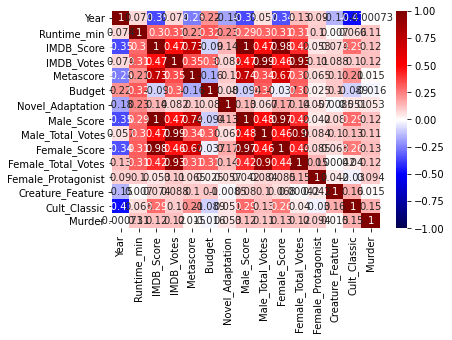

In [44]:
horror_df.corr()
sns.heatmap(horror_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [45]:
numpy.argmax(horror_df['Male_Score']-horror_df['Female_Score'])

513

In [46]:
horror_df.loc[[513]]

,Movie,Year,Runtime_min,Genres,IMDB_Score,IMDB_Votes,Metascore,Director,Star,Budget,...,Novel_Adaptation,Male_Score,Male_Total_Votes,Female_Score,Female_Total_Votes,Link_stub,Female_Protagonist,Creature_Feature,Cult_Classic,Murder
513,Piranha 3D,2010,88,"[Comedy, Fantasy, Horror ]",5.4,85803,53,Alexandre Aja,"[Elisabeth Shue, Jerry O'Connell, Richard Drey...",24000000,...,0,5.5,64444,4.8,9175,/title/tt0464154/,0,1,0,0


In [47]:
numpy.argmax(horror_df['Female_Score']-horror_df['Male_Score'])

178

In [48]:
np.argmax(horror_df['IMDB_Score']-horror_df['Male_Score'])

610

In [49]:
#testing with all non-object features
X=horror_df.loc[:,['Runtime_min','Metascore','Budget',
                  'Novel_Adaptation','Male_Score','Male_Total_Votes',
                  'Female_Total_Votes','Female_Protagonist','Creature_Feature',
                  'Cult_Classic','Murder']]
y=horror_df['Female_Score']

In [50]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=41)

In [51]:
model=sm.OLS(y_train,sm.add_constant(X_train))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Female_Score   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     809.3
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.62e-264
Time:                        22:25:21   Log-Likelihood:                 99.657
No. Observations:                 410   AIC:                            -175.3
Df Residuals:                     398   BIC:                            -127.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4473      0.091      4.921      0.000       0.269       0.626
Runtime_min            0.0004      0.001      0.486      0.627      -0.001       0.002
Metascore             -0.0057      0.001     -6.848      0.000      -0.007      -0.004
Budget              1.469e-09   4.72e-10      3.110      0.002     5.4e-10     2.4e-09
Novel_Adaptation       0.0555      0.032      1.730      0.084      -0.008       0.119
Male_Score             0.9793      0.016     59.534      0.000       0.947       1.012
Male_Total_Votes   -2.346e-06   4.18e-07     -5.618      0.000   -3.17e-06   -1.52e-06
Female_Total_Votes  9.657e-06   1.79e-06      5.391      0.000    6.14e-06    1.32e-05
Female_Protagonist     0.0623      0.025      2.503      0.013       0.013       0.111
Creature_Feature      -0.0122      0.025     -0.483      0.629      -0.062       0.037
Cult_Classic          -0.0066      0.022     -0.295      0.768      -0.050       0.037
Murder                -0.0095      0.021     -0.452      0.652      -0.051       0.032
==============================================================================
Omnibus:                       15.151   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.412
Skew:                          -0.133   Prob(JB):                     1.51e-07
Kurtosis:                       4.330   Cond. No.                     2.91e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
val_score=lr_model.score(X_val,y_val)
val_score

0.9486678925345008

In [53]:
#Removed features that were causing high condition number
X=horror_df.loc[:,['Runtime_min','Male_Score','Novel_Adaptation',
                  'Female_Protagonist','Creature_Feature',
                  'Cult_Classic','Murder']]
y=horror_df['Female_Score']

In [54]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=41)

In [55]:
model=sm.OLS(y_train,sm.add_constant(X_train))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Female_Score   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1021.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.66e-251
Time:                        22:25:31   Log-Likelihood:                 54.735
No. Observations:                 410   AIC:                            -93.47
Df Residuals:                     402   BIC:                            -61.34
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6625      0.089      7.467      0.000       0.488       0.837
Runtime_min            0.0012      0.001      1.510      0.132      -0.000       0.003
Male_Score             0.8840      0.012     74.831      0.000       0.861       0.907
Novel_Adaptation       0.0895      0.035      2.561      0.011       0.021       0.158
Female_Protagonist     0.0645      0.027      2.395      0.017       0.012       0.118
Creature_Feature      -0.0495      0.027     -1.843      0.066      -0.102       0.003
Cult_Classic          -0.0299      0.024     -1.231      0.219      -0.078       0.018
Murder                 0.0122      0.023      0.531      0.596      -0.033       0.057
==============================================================================
Omnibus:                       16.238   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.675
Skew:                          -0.126   Prob(JB):                     1.79e-08
Kurtosis:                       4.423   Cond. No.                         854.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
val_score=lr_model.score(X_val,y_val)
val_score

0.9323321215261653

In [57]:
#No male data, no directors, no genre
X=horror_df.loc[:,['Year','Runtime_min','Novel_Adaptation',
                  'Female_Protagonist','Creature_Feature',
                  'Cult_Classic','Murder','Female_Total_Votes']]
y=horror_df['Female_Score']

In [58]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=41)

In [59]:
model=sm.OLS(y_train,sm.add_constant(X_train))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Female_Score   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     38.15
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           5.98e-45
Time:                        22:25:38   Log-Likelihood:                -430.36
No. Observations:                 410   AIC:                             878.7
Df Residuals:                     401   BIC:                             914.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.3544      5.241      9.607      0.000      40.050      60.658
Year                  -0.0231      0.003     -8.743      0.000      -0.028      -0.018
Runtime_min            0.0154      0.003      5.771      0.000       0.010       0.021
Novel_Adaptation      -0.0448      0.118     -0.381      0.703      -0.276       0.186
Female_Protagonist     0.1661      0.089      1.863      0.063      -0.009       0.341
Creature_Feature      -0.0357      0.088     -0.405      0.686      -0.209       0.137
Cult_Classic           0.2013      0.085      2.356      0.019       0.033       0.369
Murder                 0.0556      0.075      0.741      0.459      -0.092       0.203
Female_Total_Votes  2.519e-05   2.52e-06      9.981      0.000    2.02e-05    3.02e-05
==============================================================================
Omnibus:                       58.330   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.570
Skew:                          -0.863   Prob(JB):                     1.07e-21
Kurtosis:                       4.635   Cond. No.                     2.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
val_score=lr_model.score(X_val,y_val)
val_score

0.29044517459574437

In [55]:
#alternate method using all of the data
y, X = patsy.dmatrices('Female_Score ~ Runtime_min + Male_Score + Novel_Adaptation + Female_Protagonist + Creature_Feature + Cult_Classic + Murder', data=horror_df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Female_Score   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1298.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:39:50   Log-Likelihood:                 55.418
No. Observations:                 569   AIC:                            -94.84
Df Residuals:                     561   BIC:                            -60.08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6765      0.080      8.499      0.000       0.520       0.833
Runtime_min            0.0013      0.001      1.825      0.068   -9.95e-05       0.003
Male_Score             0.8802      0.010     86.663      0.000       0.860       0.900
Novel_Adaptation       0.1067      0.032      3.353      0.001       0.044       0.169
Female_Protagonist     0.0794      0.023      3.467      0.001       0.034       0.124
Creature_Feature      -0.0207      0.022     -0.932      0.352      -0.064       0.023
Cult_Classic          -0.0370      0.020     -1.821      0.069      -0.077       0.003
Murder                 0.0098      0.021      0.473      0.636      -0.031       0.050
==============================================================================
Omnibus:                       27.900   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.776
Skew:                           0.171   Prob(JB):                     1.57e-16
Kurtosis:                       4.718   Cond. No.                         872.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""